In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


baseline value: Baseline Fetal Heart Rate (FHR) (beats per minute).
accelerations: Number of accelerations per second.
fetal_movement: Number of fetal movements per second
uterine_contractions: Number of uterine contractions per second
light_decelerations: Number of light decelerations (LDs) per second
severe_decelerations: Number of severe decelerations (SDs) per second
prolongued_decelerations: Number of prolonged decelerations (PDs) per second
abnormal_short_term_variability: Percentage of time with abnormal short term variability
mean_value_of_short_term_variability: Mean value of short term variability
percentage_of_time_with_abnormal_long_term_variability: Percentage of time with abnormal long term variability
mean_value_of_long_term_variability: Mean value of long term variability
histogram_width: Width of histogram made using all values from a record
histogram_min: Histogram minimum value
histogram_max: Histogram maximum value
histogram_number_of_peaks: Number of peaks in the exam histogram
histogram_number_of_zeroes: Number of zeros in the exam histogram
histogram_mode: Histogram mode
histogram_mean: Histogram mean
histogram_median: Histogram median
histogram_variance: Histogram variance
histogram_tendency: Histogram tendency
fetal_health: Encoded as 1-Normal; 2-Suspect; 3-Pathological. It is our very target column in the dataset.

In [2]:
data = pd.read_csv('../datasets/fetal_health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
data.fetal_health.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

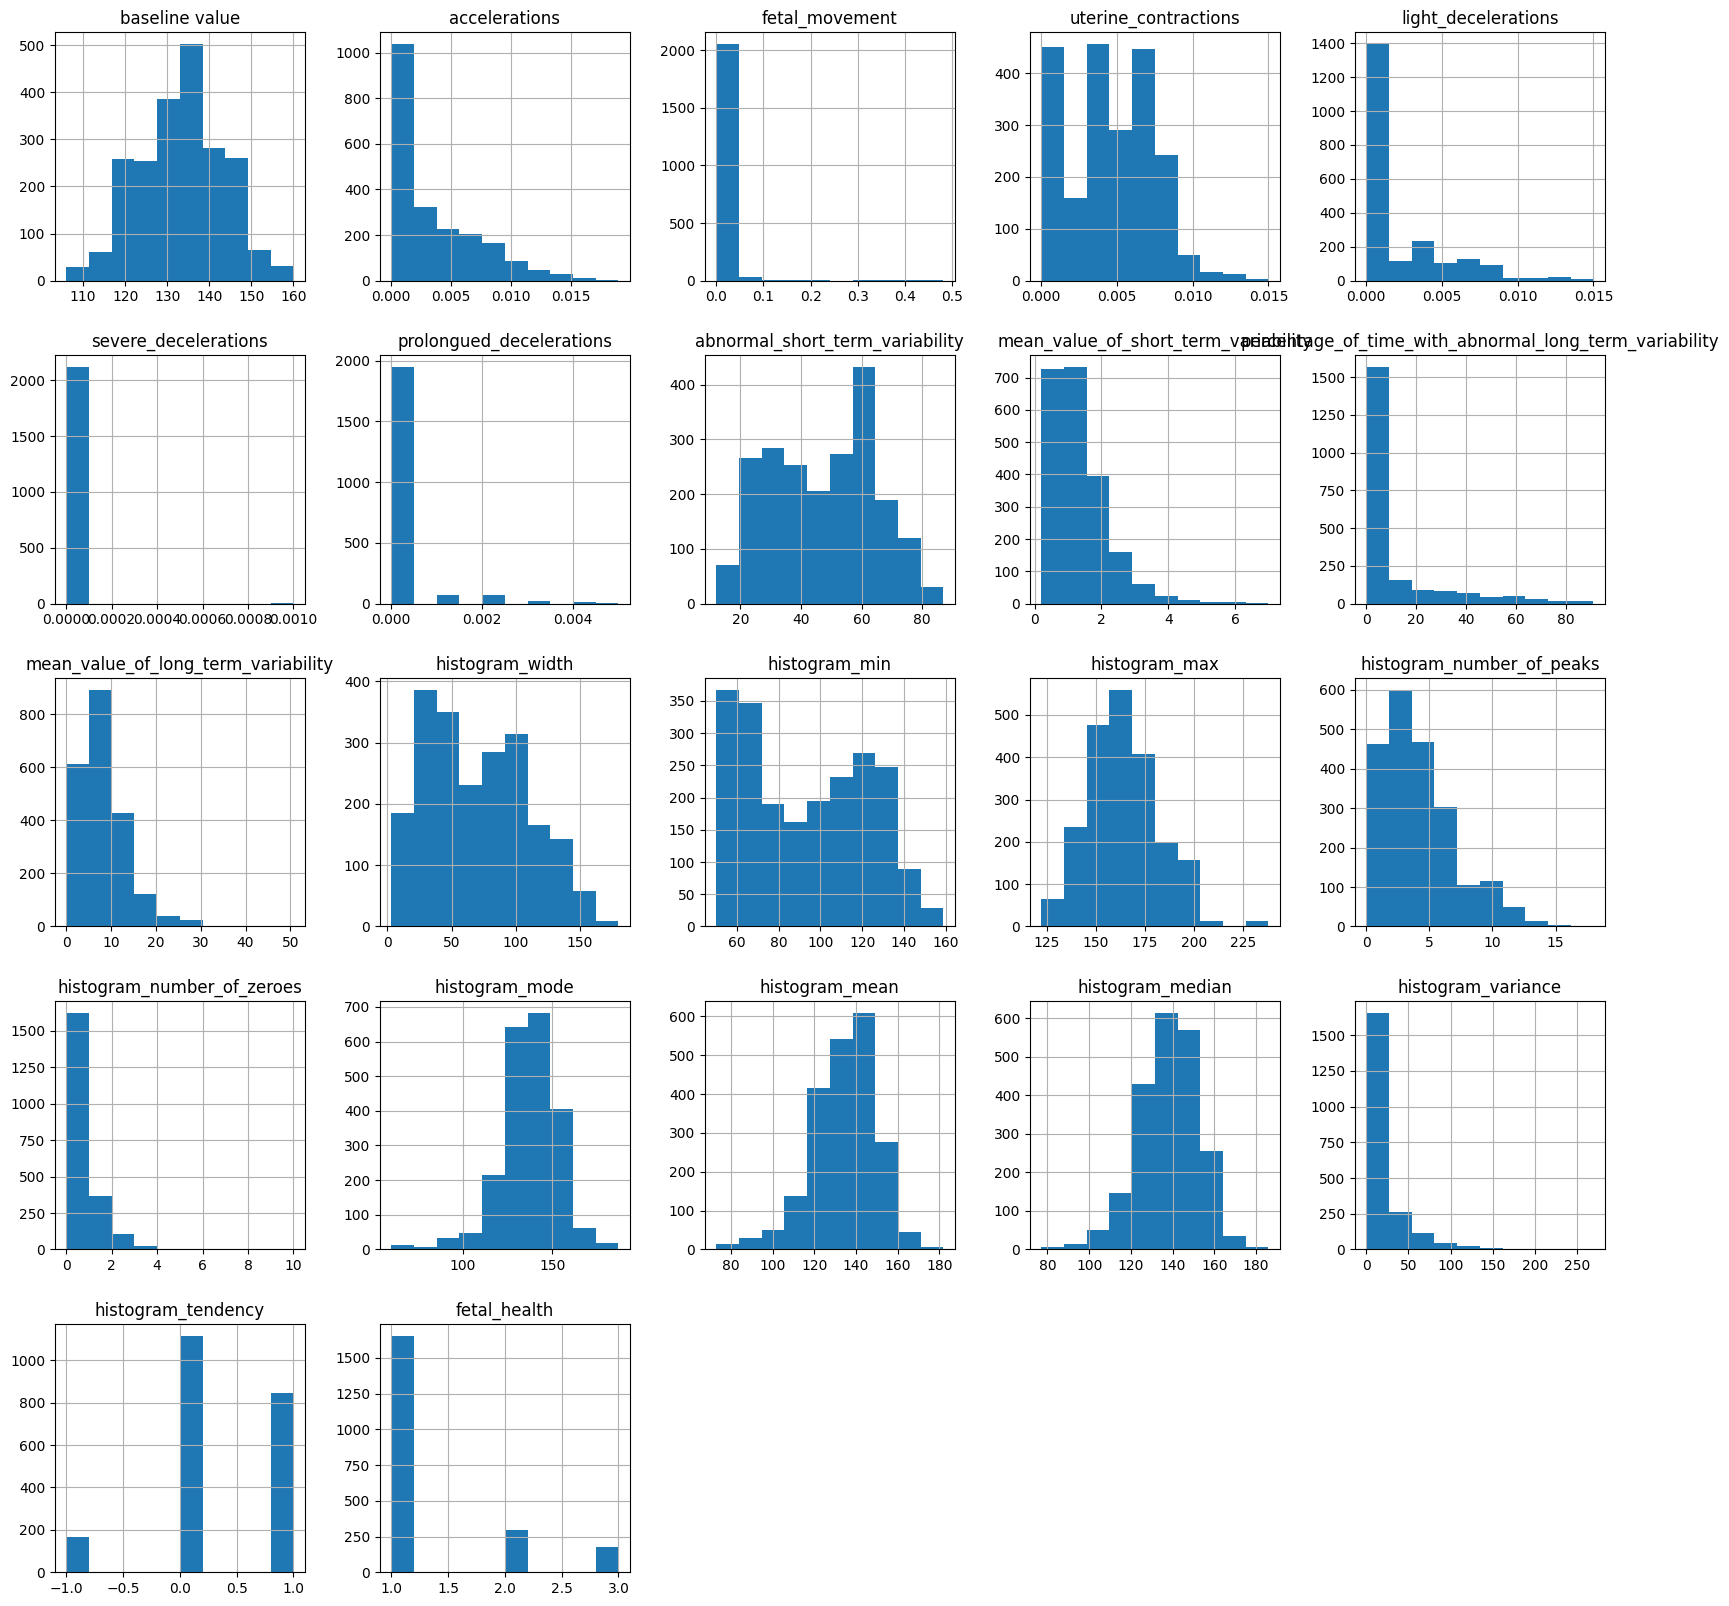

In [6]:
histo_data = data.hist(figsize=(20,20))

In [7]:
data.fetal_movement.value_counts()

0.000    1311
0.001     164
0.002     112
0.003      88
0.004      49
         ... 
0.079       1
0.109       1
0.103       1
0.031       1
0.099       1
Name: fetal_movement, Length: 102, dtype: int64

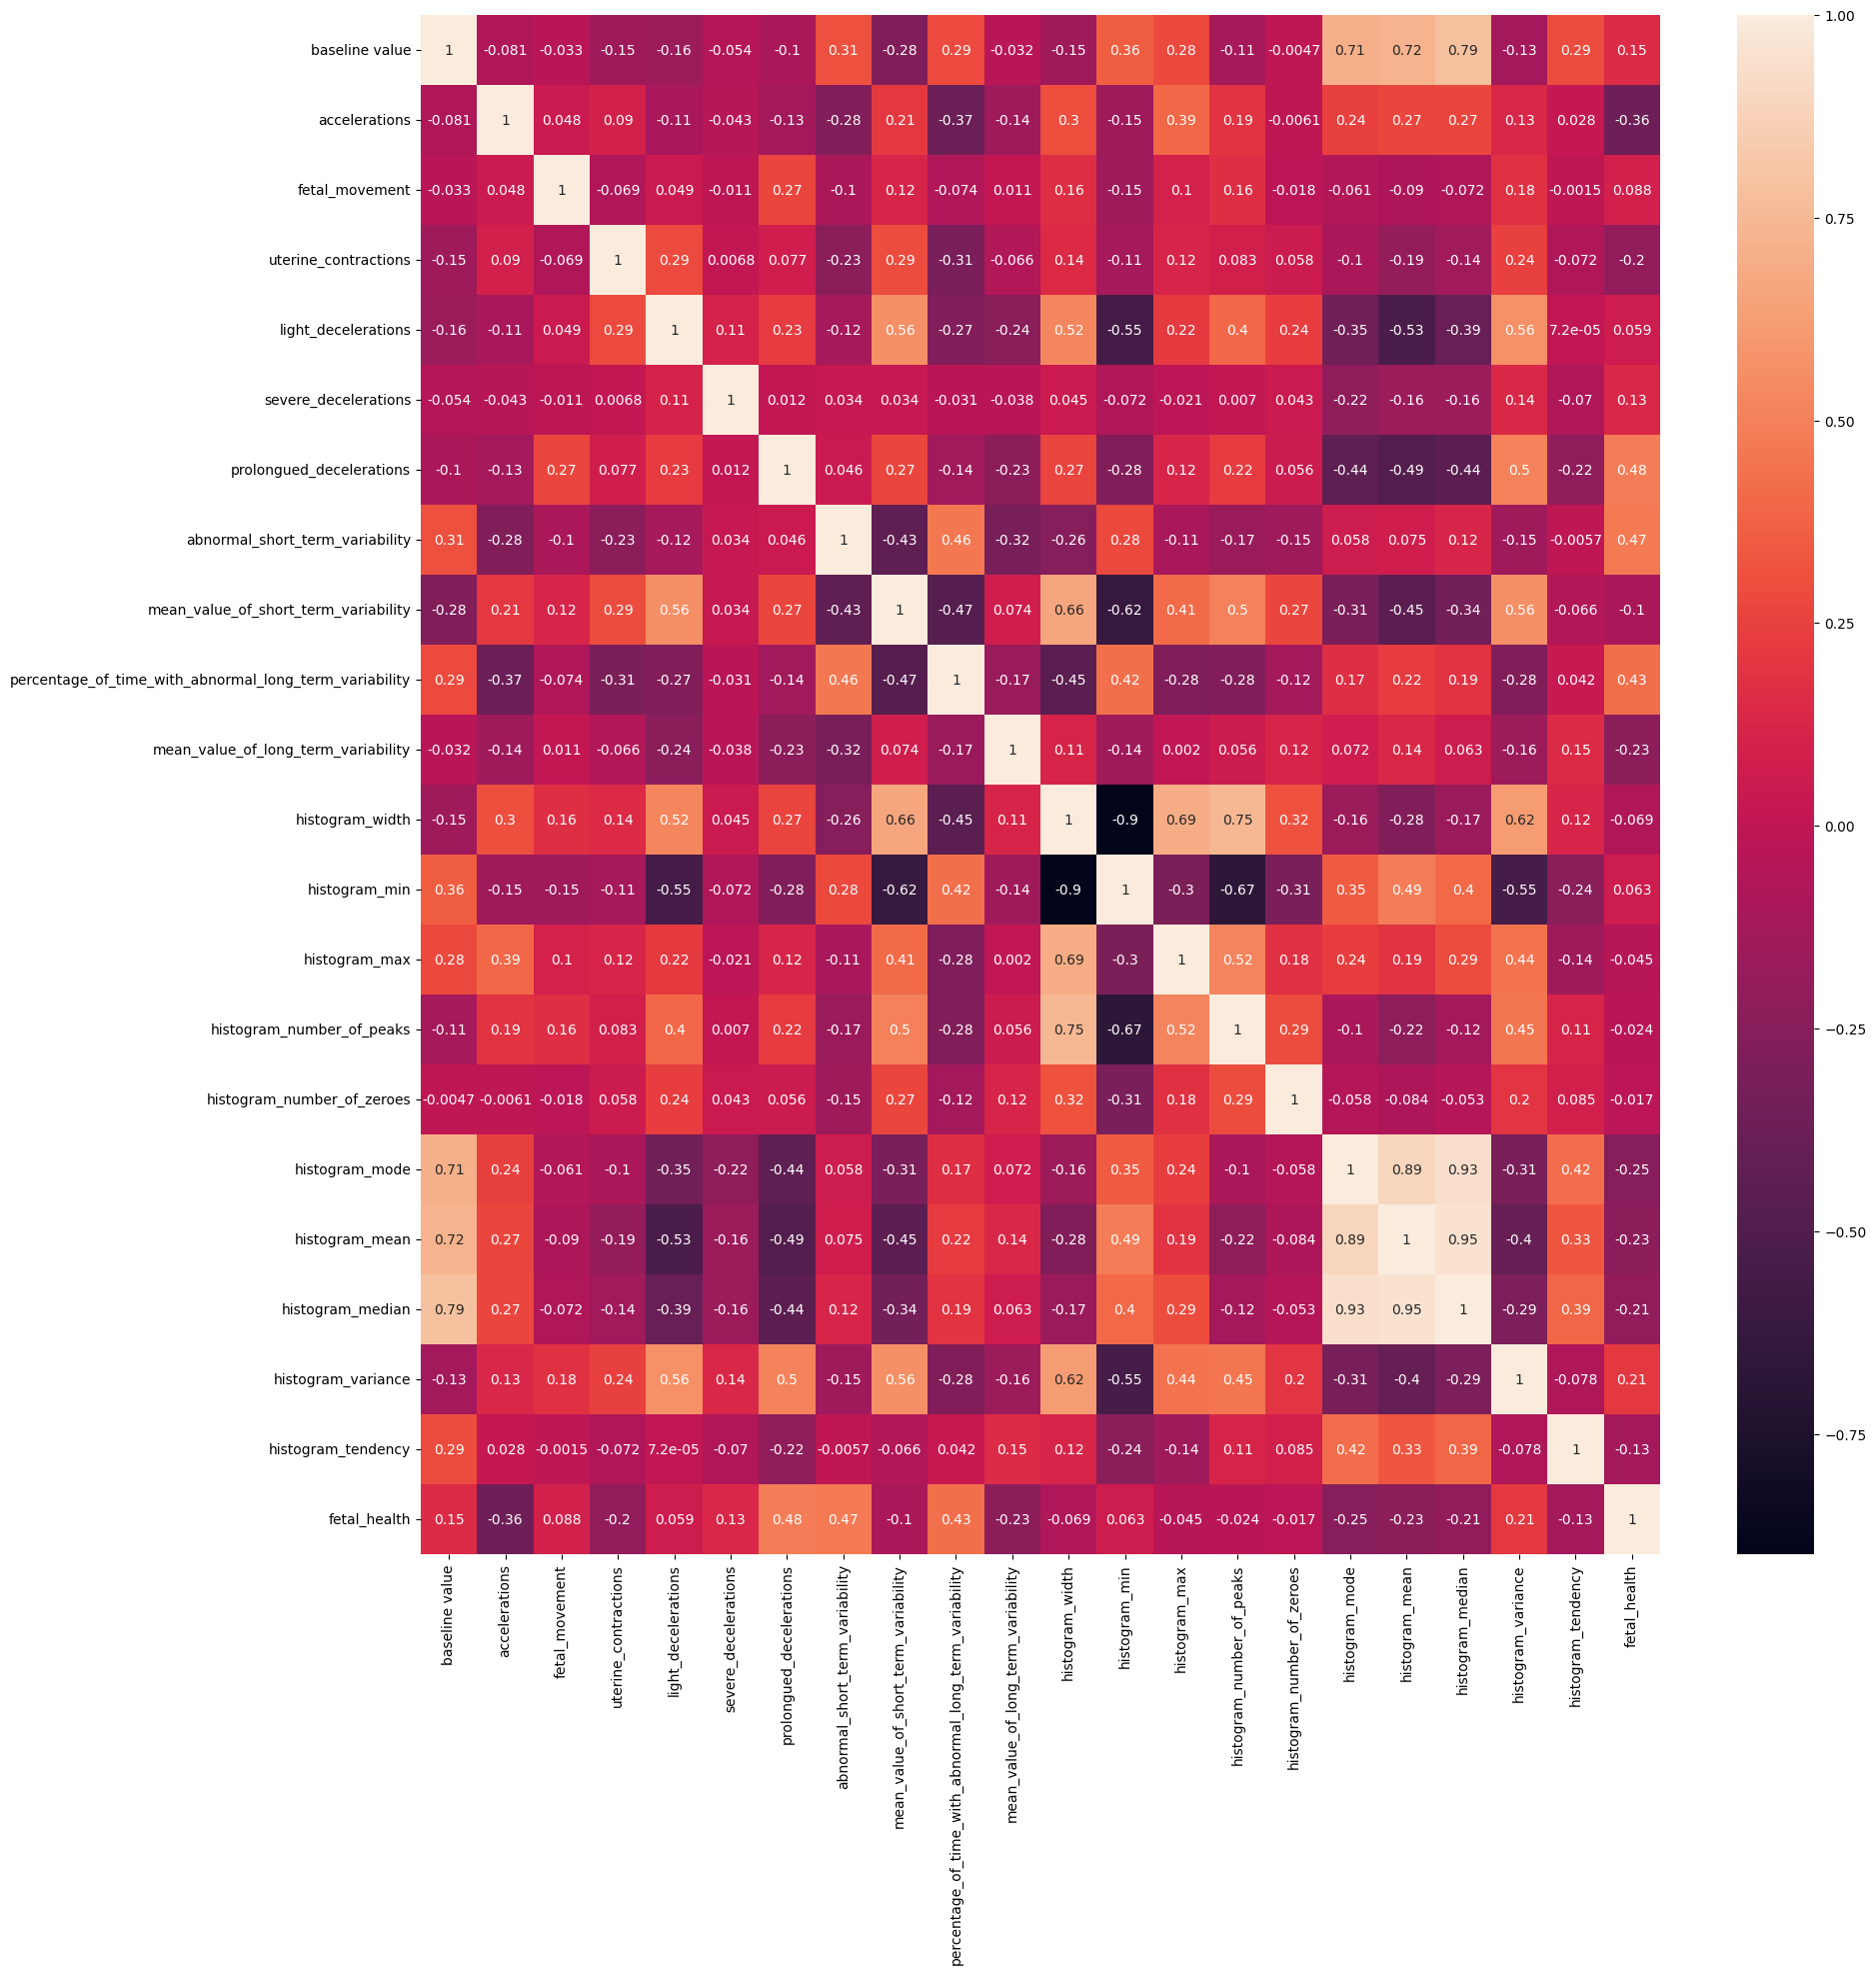

In [8]:
corrmat = data.corr()
f,ax = plt.subplots(figsize = (20,20))
sns.heatmap(corrmat,annot=True)
plt.show()

In [9]:
data_copy = data.copy()
x = data_copy.drop(['fetal_health'], axis = 1)
y = data_copy.fetal_health
print(x.shape)
print(y.shape)


(2126, 21)
(2126,)


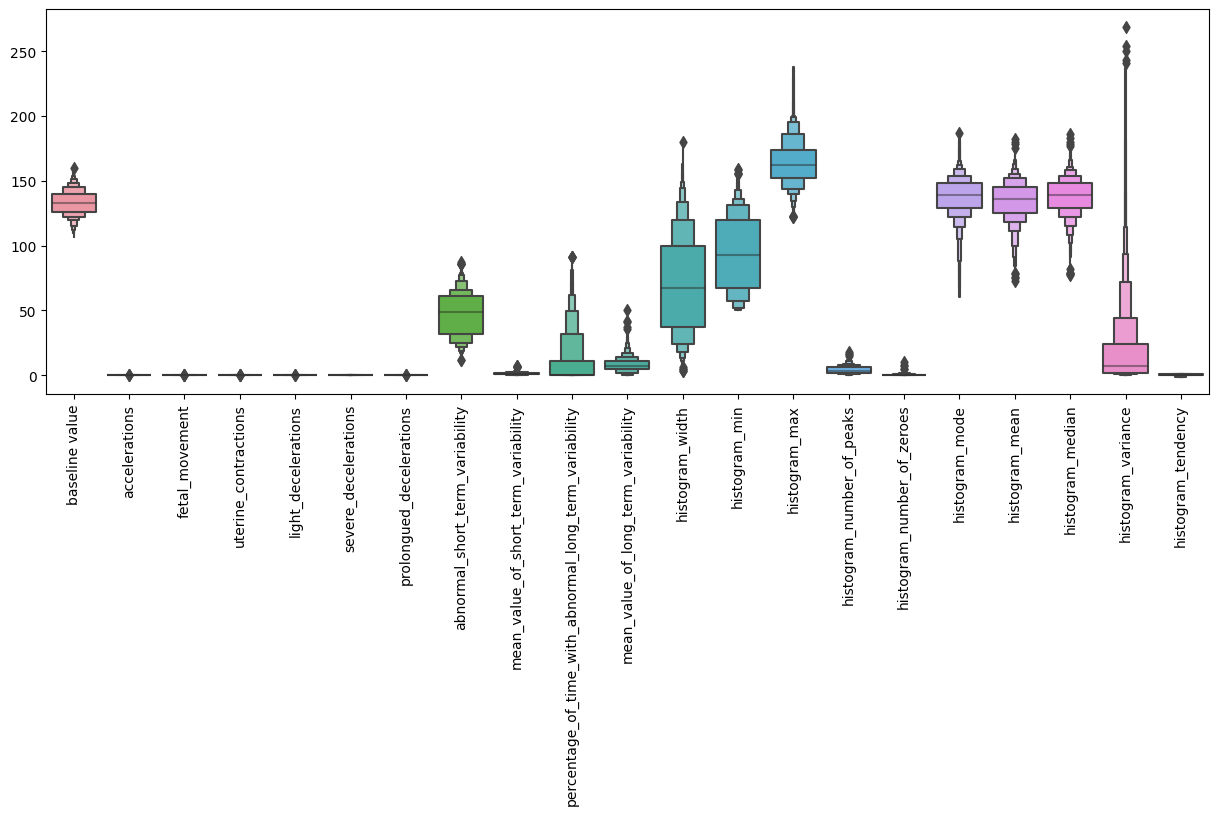

In [10]:
plt.figure(figsize=(15,5))
sns.boxenplot(data = x)
plt.xticks(rotation=90)
plt.show()

In [11]:
features = x.columns
features

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dtype='object')

<AxesSubplot: xlabel='fetal_health', ylabel='count'>

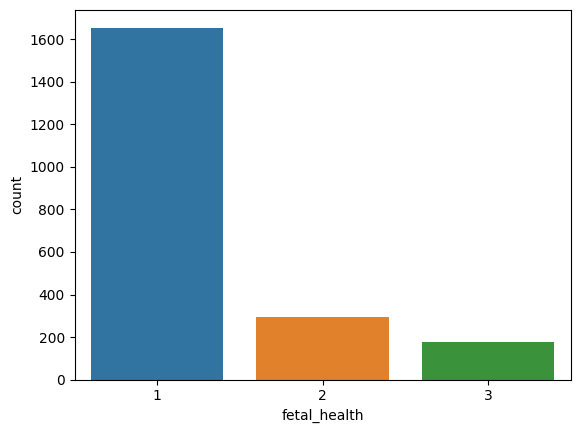

In [12]:
y = y.astype(int)
sns.countplot(x = y)

In [13]:
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()


In [14]:
x_scaled = sscaler.fit_transform(x)
print(x_scaled.shape)

(2126, 21)


In [15]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced',y=y,classes=np.unique(y))
class_weights

array([0.42819738, 2.40225989, 4.02651515])

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1700, 21) (1700,)
(426, 21) (426,)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score,accuracy_score,f1_score,fbeta_score

In [18]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('AB', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBoost',GradientBoostingClassifier()))

In [19]:
num_folds = 12
num_instances = len(x_train)
seed = 7
scoring = 'accuracy'

In [20]:
#results = []
#names = []
#for name, model in models:
 #   kfold = KFold(n_splits=num_folds)
  #  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
   # results.append(cv_results)
    #names.append(name)
    #scores = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #print(scores)

In [21]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=-1,ignore_warnings=True,custom_metric=None)
models,predictions = clf.fit(x_train,x_test,y_train,y_test)
models

100%|██████████| 29/29 [00:13<00:00,  2.11it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.96,0.93,None,0.96,0.71
DecisionTreeClassifier,0.92,0.91,None,0.93,0.02
RandomForestClassifier,0.95,0.89,None,0.95,0.39
BaggingClassifier,0.93,0.89,None,0.93,0.40
ExtraTreesClassifier,0.94,0.87,None,0.94,0.24
AdaBoostClassifier,0.91,0.85,None,0.91,1.33
LabelPropagation,0.92,0.83,None,0.91,0.29
LabelSpreading,0.92,0.83,None,0.91,0.25
SVC,0.90,0.81,None,0.90,0.11


In [22]:
rf = RandomForestClassifier()
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [23]:
rf_grid_params = {

    #'max_depth' : [20,30,40,50],
    'max_features' : ['auto',2,4,6,8],
    'n_estimators' : [100,120,140],
    'bootstrap' : [True,False],
    'criterion' : ['gini','entropy']
}

In [26]:
from sklearn.metrics import fbeta_score, make_scorer
f1_scorer = make_scorer(f1_score)
rf_grid = GridSearchCV(
    estimator= rf,
    param_grid= rf_grid_params,
    scoring= f1_scorer,
    n_jobs=-1,
    cv=5
)

rf_grid.fit(x_train,y_train)
print(rf_grid.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100}


In [27]:
rf = RandomForestClassifier(bootstrap= True,
                            class_weight={1 : 0.42819738, 2 : 2.40225989, 3 : 4.02651515},
                            criterion='gini',
                            max_features='auto',
                            n_estimators=150)
rf.fit(x_train,y_train)                            

RandomForestClassifier(class_weight={1: 0.42819738, 2: 2.40225989,
                                     3: 4.02651515},
                       max_features='auto', n_estimators=150)

Accuracy Score 0.9460093896713615
F1 score 0.915510728238328
              precision    recall  f1-score   support

           1       0.95      0.98      0.97       333
           2       0.89      0.75      0.81        64
           3       0.97      0.97      0.97        29

    accuracy                           0.95       426
   macro avg       0.94      0.90      0.92       426
weighted avg       0.94      0.95      0.94       426



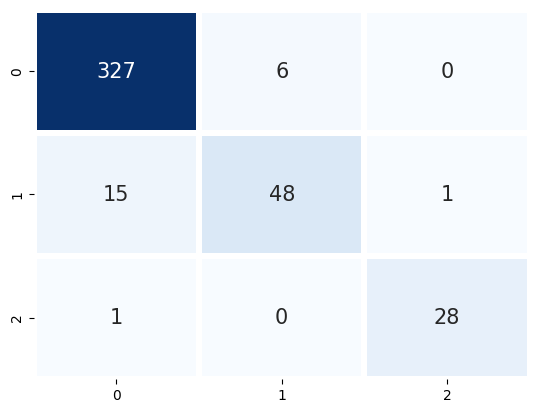

In [28]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,f1_score,fbeta_score
#beta_val = 2
predictiction = rf.predict(x_test)
pred = predictiction.ravel()
accuracy = accuracy_score(y_test, pred)
print('Accuracy Score',accuracy)
print('F1 score',f1_score(y_test,pred, average = 'macro'))
#print(f'F beta {beta_val} score', fbeta_score(y_test,pred,beta=beta_val))
#print('ROC score',roc_auc_score(y_test,pred))
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', 
            linewidths = 3, cbar = False, annot_kws = {'fontsize': 15})
print(classification_report(y_test, pred))

In [29]:
print('F1 score',f1_score(y_test,pred, average = 'macro'))
print('F1 score',f1_score(y_test,pred, average = 'micro'))

F1 score 0.915510728238328
F1 score 0.9460093896713615


In [30]:
import lightgbm as lgb
classifier = lgb.LGBMClassifier()


In [31]:
classifier.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq'])

In [64]:
grid_params = {
    'learning_rate': [0.03,0.4,0.5],
    #'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16,18], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    'objective' : ['multiclass'],
    'num_class': [3],
    'max_bin':[255,500, 510], # large max_bin helps improve accuracy but might slow down training progress
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65],
    'subsample' : [0.7,0.75,0.8],
    'reg_alpha' : [1,1.2,1.3,1.4],
    'reg_lambda' : [1,1.2,1.4,1.5,1.6],
    }

In [65]:
gd_sr = GridSearchCV(estimator = classifier,
                     param_grid = grid_params,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)
gd_sr.fit(x_train,y_train)                     

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'colsample_bytree': [0.64, 0.65],
                         'learning_rate': [0.03, 0.4, 0.5],
                         'max_bin': [255, 500, 510], 'num_class': [3],
                         'num_leaves': [6, 8, 12, 16, 18],
                         'objective': ['multiclass'], 'random_state': [500],
                         'reg_alpha': [1, 1.2, 1.3, 1.4],
                         'reg_lambda': [1, 1.2, 1.4, 1.5, 1.6],
                         'subsample': [0.7, 0.75, 0.8]},
             scoring='accuracy')

In [66]:
gd_sr.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.64,
 'learning_rate': 0.4,
 'max_bin': 255,
 'num_class': 3,
 'num_leaves': 6,
 'objective': 'multiclass',
 'random_state': 500,
 'reg_alpha': 1,
 'reg_lambda': 1.6,
 'subsample': 0.7}

In [73]:
model = lgb.LGBMClassifier(boosting_type = 'gbdt', colsample_bytree = 0.64, 
                                learning_rate = 0.4, max_bin = 255, num_leaves = 6, objective = 'multiclass', 
                                random_state = 500, metric = 'multi_logloss',
                                reg_alpha = 1, reg_lambda = 1.6, subsample = 0.7)

                                

In [74]:
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)])

[1]	training's multi_logloss: 0.370215	valid_0's multi_logloss: 0.370195
[2]	training's multi_logloss: 0.292288	valid_0's multi_logloss: 0.293999
[3]	training's multi_logloss: 0.241317	valid_0's multi_logloss: 0.252103
[4]	training's multi_logloss: 0.205952	valid_0's multi_logloss: 0.219233
[5]	training's multi_logloss: 0.184158	valid_0's multi_logloss: 0.20149
[6]	training's multi_logloss: 0.165762	valid_0's multi_logloss: 0.186601
[7]	training's multi_logloss: 0.154285	valid_0's multi_logloss: 0.180426
[8]	training's multi_logloss: 0.143901	valid_0's multi_logloss: 0.173819
[9]	training's multi_logloss: 0.135657	valid_0's multi_logloss: 0.168225
[10]	training's multi_logloss: 0.12832	valid_0's multi_logloss: 0.16717
[11]	training's multi_logloss: 0.122841	valid_0's multi_logloss: 0.167709
[12]	training's multi_logloss: 0.11809	valid_0's multi_logloss: 0.166776
[13]	training's multi_logloss: 0.113112	valid_0's multi_logloss: 0.165178
[14]	training's multi_logloss: 0.108468	valid_0's m

LGBMClassifier(colsample_bytree=0.64, learning_rate=0.4, max_bin=255,
               metric='multi_logloss', num_leaves=6, objective='multiclass',
               random_state=500, reg_alpha=1, reg_lambda=1.6, subsample=0.7)

Accuracy Score 0.9507042253521126
F1 score 0.9183920774939218
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       333
           2       0.85      0.86      0.85        64
           3       0.93      0.93      0.93        29

    accuracy                           0.95       426
   macro avg       0.92      0.92      0.92       426
weighted avg       0.95      0.95      0.95       426



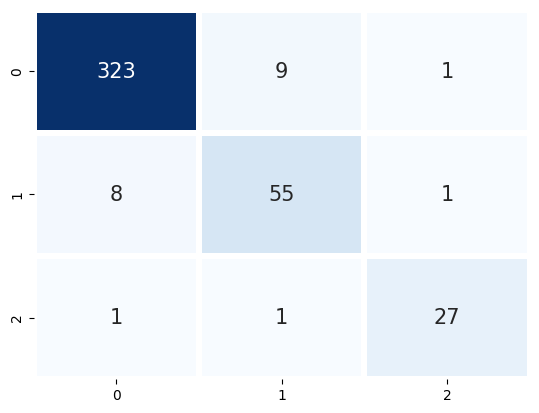

In [75]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,f1_score,fbeta_score
#beta_val = 2
predictiction = model.predict(x_test)
pred = predictiction.ravel()
accuracy = accuracy_score(y_test, pred)
print('Accuracy Score',accuracy)
print('F1 score',f1_score(y_test,pred, average = 'macro'))
#print(f'F beta {beta_val} score', fbeta_score(y_test,pred,beta=beta_val))
print('ROC score',roc_auc_score(y_test,pred))
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', 
            linewidths = 3, cbar = False, annot_kws = {'fontsize': 15})
print(classification_report(y_test, pred))

In [56]:
import joblib
joblib.dump(model,'../models/fetal_health_lgbm.sav')

['../models/fetal_health_lgbm.sav']

In [60]:
model = lgb.LGBMClassifier(boosting_type = 'gbdt', colsample_bytree = 0.64, 
                                learning_rate = 0.5, max_bin = 550, num_leaves = 22, objective = 'multiclass', 
                                random_state = 500, metric = 'multi_logloss',
                                reg_alpha = 1, reg_lambda = 1, subsample = 0.7)

model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)])
                                

[1]	training's multi_logloss: 0.296035	valid_0's multi_logloss: 0.313631
[2]	training's multi_logloss: 0.214148	valid_0's multi_logloss: 0.242896
[3]	training's multi_logloss: 0.162009	valid_0's multi_logloss: 0.201645
[4]	training's multi_logloss: 0.129271	valid_0's multi_logloss: 0.17701
[5]	training's multi_logloss: 0.108305	valid_0's multi_logloss: 0.164028
[6]	training's multi_logloss: 0.0928579	valid_0's multi_logloss: 0.155094
[7]	training's multi_logloss: 0.0783769	valid_0's multi_logloss: 0.155342
[8]	training's multi_logloss: 0.0695582	valid_0's multi_logloss: 0.153714
[9]	training's multi_logloss: 0.0620101	valid_0's multi_logloss: 0.149827
[10]	training's multi_logloss: 0.0558453	valid_0's multi_logloss: 0.148624
[11]	training's multi_logloss: 0.0503091	valid_0's multi_logloss: 0.148687
[12]	training's multi_logloss: 0.0463255	valid_0's multi_logloss: 0.147527
[13]	training's multi_logloss: 0.0426862	valid_0's multi_logloss: 0.146065
[14]	training's multi_logloss: 0.0402408

LGBMClassifier(colsample_bytree=0.64, learning_rate=0.5, max_bin=550,
               metric='multi_logloss', num_leaves=20, objective='multiclass',
               random_state=500, reg_alpha=1, reg_lambda=1, subsample=0.7)

Accuracy Score 0.9483568075117371
F1 score 0.914121401422661
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       333
           2       0.85      0.83      0.84        64
           3       0.93      0.93      0.93        29

    accuracy                           0.95       426
   macro avg       0.92      0.91      0.91       426
weighted avg       0.95      0.95      0.95       426



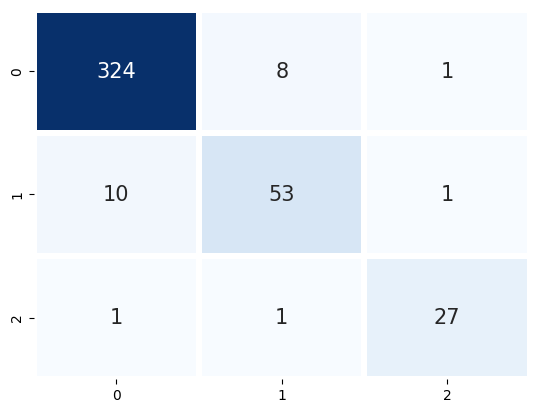

In [61]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,f1_score,fbeta_score
#beta_val = 2
predictiction = model.predict(x_test)
pred = predictiction.ravel()
accuracy = accuracy_score(y_test, pred)
print('Accuracy Score',accuracy)
print('F1 score',f1_score(y_test,pred, average = 'macro'))
#print(f'F beta {beta_val} score', fbeta_score(y_test,pred,beta=beta_val))
#print('ROC score',roc_auc_score(y_test,pred))
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', 
            linewidths = 3, cbar = False, annot_kws = {'fontsize': 15})
print(classification_report(y_test, pred))